In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('advertising.csv')

# Basic Info 

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA ( Check for missing values )

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA ( Summery Statistics )

In [7]:
df.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# EDA ( Outliers Detection )

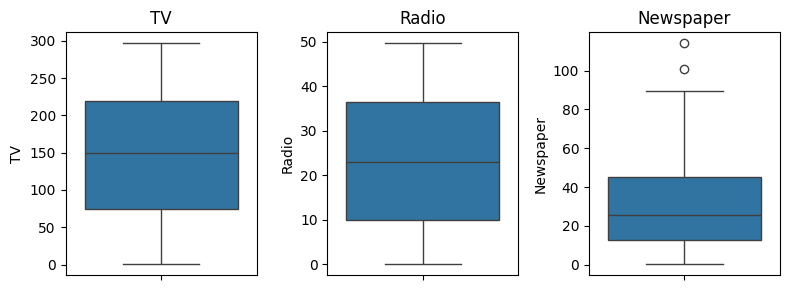

In [8]:
plt.figure(figsize=(8,3))
# TV 
plt.subplot(1,3,1)
sns.boxplot(df['TV'])
plt.title("TV")

# Radio
plt.subplot(1,3,2)
sns.boxplot(df['Radio'])
plt.title("Radio")

# Newespaper
plt.subplot(1,3,3)
sns.boxplot(df['Newspaper'])
plt.title("Newspaper")
plt.tight_layout()
plt.show()

# EDA ( Visulize Relationship )

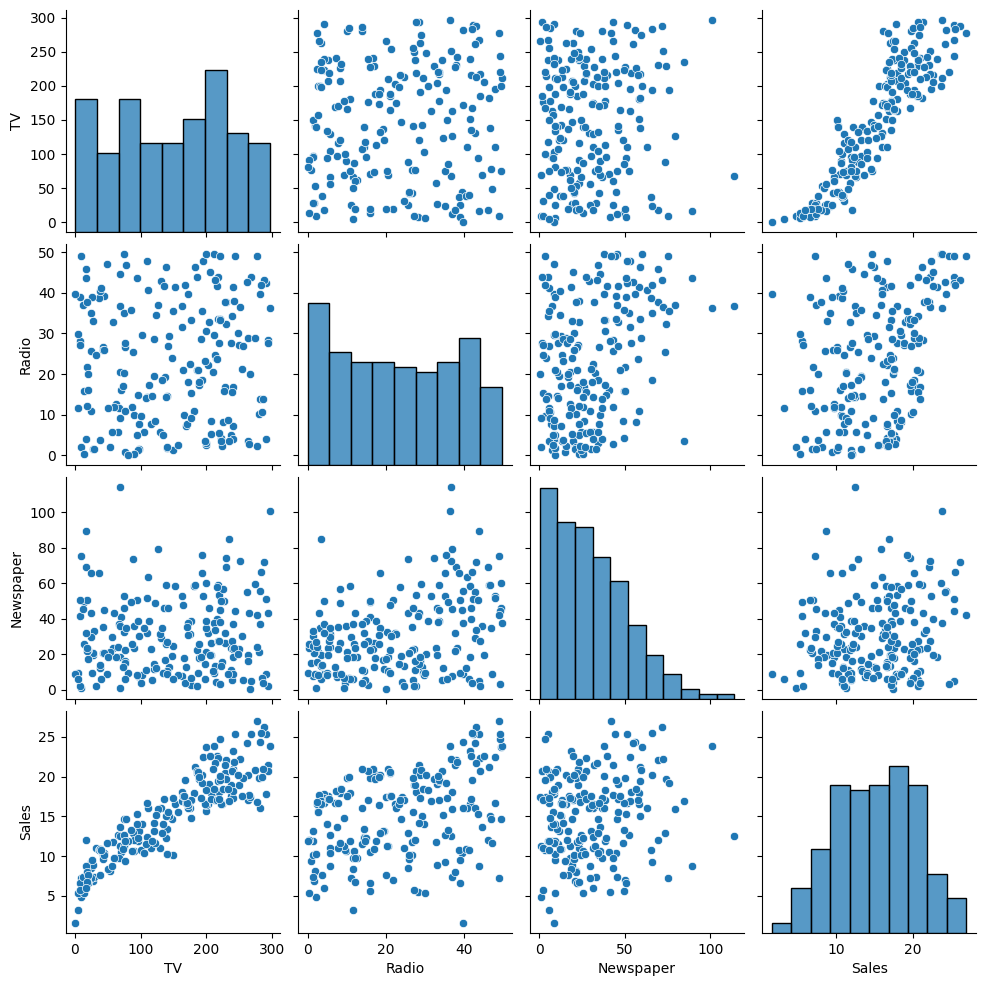

In [9]:
sns.pairplot(df)
plt.show()

# EDA ( Lets see how Sales are related with other variables using Scatter plot )

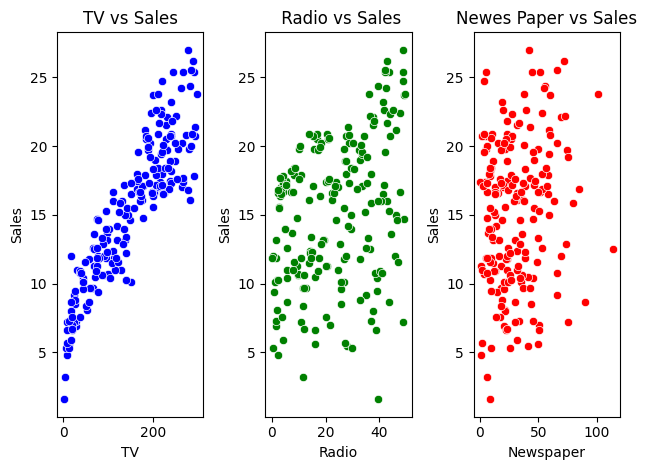

In [10]:
# TV vs Sales
plt.subplot(1,3,1)
sns.scatterplot(x = 'TV', y= 'Sales', data= df , color = 'blue')
plt.title("TV vs Sales")

# Radio vs Sales
plt.subplot(1,3,2)
sns.scatterplot(x = 'Radio', y = "Sales", data=df,color = 'green')
plt.title(" Radio vs Sales")

plt.subplot(1,3,3)
# News Paper vs Sales
sns.scatterplot(x = 'Newspaper', y= "Sales", data=df , color = 'red')
plt.title("Newes Paper vs Sales")

plt.tight_layout()
plt.show()

# EDA ( Let's see the correlation between different variables )

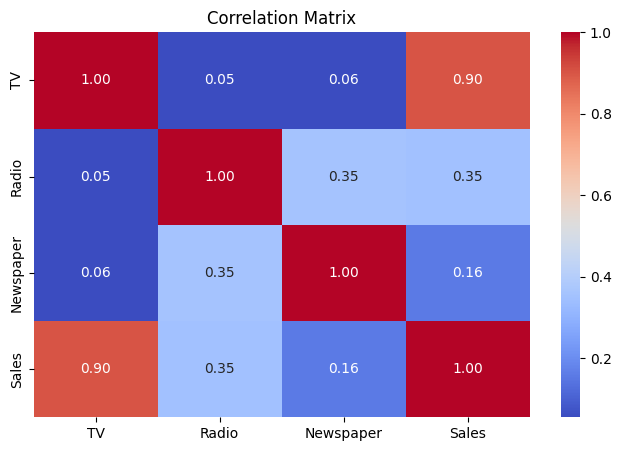

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot= True , cmap= 'coolwarm' , fmt= '.2f')
plt.title("Correlation Matrix")
plt.show()

## Comment :
#### From this dataset, it is evidet that TV advertising has the strongest impact on sales (correlation = 0.90),folowed by Radio advestising  (correlation = 0.35 ) , While Newspaper advertising has a relatively week impact ( correlation = 0.16 ).To optimize advertising strategies , business should prioritize increasing the budget for TV while considering reducing the budget for Radio and Newspaper advertising and reallocating it to more effective platforms 

# Building The Model 
### Train - Test Split ( 80 - 20 % )

In [12]:
from sklearn.model_selection import train_test_split
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

###  Linear Regression Model Fit 

In [14]:
# Modele Training 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
# Prediction
predicted_y = model.predict(x_test)

# Model Evaluation 

In [16]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# R Squared value
print("R Squared Score is :",r2_score(y_test,predicted_y))

# Mean Absolute Error 
print("Mean Absolute Error square is :",mean_absolute_error(y_test,predicted_y))

# Mean Squared Error 
print("Mean Squared Error is :",mean_squared_error(y_test,predicted_y))


R Squared Score is : 0.9059011844150826
Mean Absolute Error square is : 1.2748262109549338
Mean Squared Error is : 2.9077569102710896


#### The model demonstrates excellent performance, as evidenced by the high R-squared value and low error metrics (MAE and MSE). It effectively explains the relationship between advertising budgets and sales, making it a reliable tool for predicting sales based on advertising expenditures. However, it’s always good to validate the model on new data and ensure it generalizes well to unseen scenarios. Great job! 

# Actual vs Predicted Sales Line Chart 

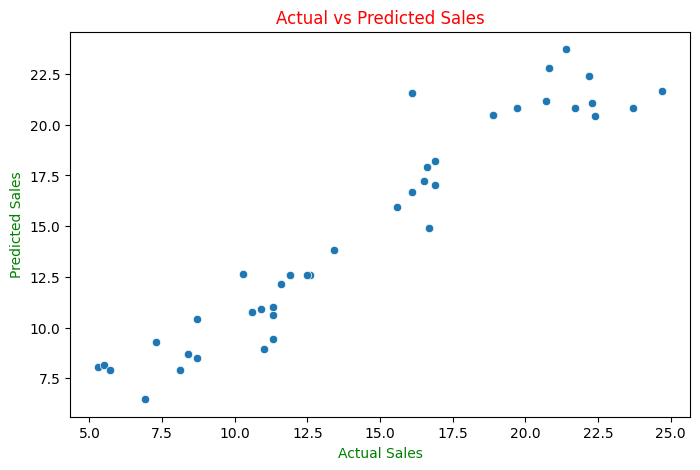

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = y_test,y=predicted_y)
plt.xlabel("Actual Sales",color = 'green')
plt.ylabel("Predicted Sales",color = 'green')
plt.title("Actual vs Predicted Sales",color = 'red')
plt.show()
